# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

A = np.arange(100).reshape((10, 10))
print(A)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [ ]:
# Посчитайте средние значения в матрице по столбцам

msum = np.mean(A, axis = 0)
print(msum)

[45. 46. 47. 48. 49. 50. 51. 52. 53. 54.]


In [ ]:
# Транспонируйте матрицу A

a = A.transpose()
print(a)

[[ 0 10 20 30 40 50 60 70 80 90]
 [ 1 11 21 31 41 51 61 71 81 91]
 [ 2 12 22 32 42 52 62 72 82 92]
 [ 3 13 23 33 43 53 63 73 83 93]
 [ 4 14 24 34 44 54 64 74 84 94]
 [ 5 15 25 35 45 55 65 75 85 95]
 [ 6 16 26 36 46 56 66 76 86 96]
 [ 7 17 27 37 47 57 67 77 87 97]
 [ 8 18 28 38 48 58 68 78 88 98]
 [ 9 19 29 39 49 59 69 79 89 99]]


In [ ]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

b = A*a
print(b)

[[   0   10   40   90  160  250  360  490  640  810]
 [  10  121  252  403  574  765  976 1207 1458 1729]
 [  40  252  484  736 1008 1300 1612 1944 2296 2668]
 [  90  403  736 1089 1462 1855 2268 2701 3154 3627]
 [ 160  574 1008 1462 1936 2430 2944 3478 4032 4606]
 [ 250  765 1300 1855 2430 3025 3640 4275 4930 5605]
 [ 360  976 1612 2268 2944 3640 4356 5092 5848 6624]
 [ 490 1207 1944 2701 3478 4275 5092 5929 6786 7663]
 [ 640 1458 2296 3154 4032 4930 5848 6786 7744 8722]
 [ 810 1729 2668 3627 4606 5605 6624 7663 8722 9801]]


In [ ]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = A.dot(A)
print(B)

[[ 2850  2895  2940  2985  3030  3075  3120  3165  3210  3255]
 [ 7350  7495  7640  7785  7930  8075  8220  8365  8510  8655]
 [11850 12095 12340 12585 12830 13075 13320 13565 13810 14055]
 [16350 16695 17040 17385 17730 18075 18420 18765 19110 19455]
 [20850 21295 21740 22185 22630 23075 23520 23965 24410 24855]
 [25350 25895 26440 26985 27530 28075 28620 29165 29710 30255]
 [29850 30495 31140 31785 32430 33075 33720 34365 35010 35655]
 [34350 35095 35840 36585 37330 38075 38820 39565 40310 41055]
 [38850 39695 40540 41385 42230 43075 43920 44765 45610 46455]
 [43350 44295 45240 46185 47130 48075 49020 49965 50910 51855]]


#### Не меняйте следующую ячейку. Просто запустите ее.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [ ]:
import pandas as pd

In [ ]:
# If on colab, uncomment the following lines

!wget "https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic/homeworks/HW_1_Linclass_kNN/forest_dataset.csv" -O forest_dataset.csv

--2019-09-29 13:14:53--  https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic/homeworks/HW_1_Linclass_kNN/forest_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1293856 (1.2M) [text/plain]
Saving to: ‘forest_dataset.csv’

forest_dataset.csv  100%[===================>]   1.23M  --.-KB/s    in 0.05s   

2019-09-29 13:14:54 (26.9 MB/s) - ‘forest_dataset.csv’ saved [1293856/1293856]



In [ ]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [ ]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [ ]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels, test_size = 0.25, random_state = 0)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [ ]:
lr_clf = LogisticRegression()

In [ ]:
lr_clf.fit(train_feature_matrix, train_labels)
prediction = lr_clf.predict(test_feature_matrix)
print("accuracy: %f" % accuracy_score(test_labels, prediction))
print("f1_score: %f" % f1_score(test_labels, prediction))

accuracy: 0.774212
f1_score: 0.739042


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [ ]:
from sklearn.preprocessing import scale

lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=3000)

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)
train_feature_matrix = scale(train_feature_matrix)
test_feature_matrix = scale(test_feature_matrix)

lr_clf.fit(train_feature_matrix, train_labels)
prediction = lr_clf.predict(test_feature_matrix)
print("accuracy %f" % accuracy_score(test_labels, prediction))

accuracy 0.718125


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [ ]:
from sklearn.model_selection import GridSearchCV

c = np.linspace(0.01, 1, 10)
p = {'penalty':['l1', 'l2'], 'C':c}
classif = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000), p, scoring='accuracy', cv=5, verbose = 2)
classif.fit(train_feature_matrix, train_labels)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.01, penalty=l1, total=   6.5s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV] ............................... C=0.01, penalty=l1, total=   6.3s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   6.4s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   6.7s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ............................... C=0.01, penalty=l1, total=   6.7s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   4.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   4.1s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   4.2s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.12, penalty=l1, total=  18.0s
[CV] C=0.12, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.12, penalty=l1, total=  17.9s
[CV] C=0.12, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.12, penalty=l1, total=  17.9s
[CV] C=0.12, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.12, penalty=l1, total=  18.1s
[CV] C=0.12, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.12, penalty=l1, total=  18.2s
[CV] C=0.12, penalty=l2 ..............................................
[CV] ............................... C=0.12, penalty=l2, total=  10.7s
[CV] C=0.12, penalty=l2 ..............................................
[CV] ............................... C=0.12, penalty=l2, total=  11.1s
[CV] C=0.12, penalty=l2 ..............................................
[CV] ............................... C=0.12, penalty=l2, total=  10.9s
[CV] C=0.12, penalty=l2 ..............................................
[CV] ............................... C=0.12, penalty=l2, total=  10.9s
[CV] C=0.12, penalty=l2 ..............................................
[CV] ............................... C=0.12, penalty=l2, total=  10.8s
[CV] C=0.23, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l1, total=  18.1s
[CV] C=0.23, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l1, total=  18.1s
[CV] C=0.23, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l1, total=  18.1s
[CV] C=0.23, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l1, total=  18.1s
[CV] C=0.23, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l1, total=  18.1s
[CV] C=0.23, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l2, total=  13.7s
[CV] C=0.23, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l2, total=  14.0s
[CV] C=0.23, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l2, total=  13.9s
[CV] C=0.23, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l2, total=  13.9s
[CV] C=0.23, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.23, penalty=l2, total=  13.8s
[CV] C=0.34, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l1, total=  18.2s
[CV] C=0.34, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l1, total=  18.1s
[CV] C=0.34, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l1, total=  18.3s
[CV] C=0.34, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l1, total=  18.3s
[CV] C=0.34, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l1, total=  18.4s
[CV] C=0.34, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l2, total=  13.8s
[CV] C=0.34, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l2, total=  13.7s
[CV] C=0.34, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l2, total=  13.8s
[CV] C=0.34, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l2, total=  13.8s
[CV] C=0.34, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.34, penalty=l2, total=  13.7s
[CV] C=0.45, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l1, total=  18.2s
[CV] C=0.45, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l1, total=  18.1s
[CV] C=0.45, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l1, total=  18.2s
[CV] C=0.45, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l1, total=  18.3s
[CV] C=0.45, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l1, total=  18.2s
[CV] C=0.45, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l2, total=  13.6s
[CV] C=0.45, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l2, total=  13.8s
[CV] C=0.45, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l2, total=  13.7s
[CV] C=0.45, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l2, total=  13.7s
[CV] C=0.45, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.45, penalty=l2, total=  13.7s
[CV] C=0.56, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l1, total=  18.3s
[CV] C=0.56, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l1, total=  18.3s
[CV] C=0.56, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l1, total=  18.2s
[CV] C=0.56, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l1, total=  18.2s
[CV] C=0.56, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l1, total=  18.4s
[CV] C=0.56, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l2, total=  13.7s
[CV] C=0.56, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l2, total=  13.9s
[CV] C=0.56, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l2, total=  13.7s
[CV] C=0.56, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l2, total=  13.9s
[CV] C=0.56, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.56, penalty=l2, total=  13.8s
[CV] C=0.67, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l1, total=  18.2s
[CV] C=0.67, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l1, total=  18.3s
[CV] C=0.67, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l1, total=  18.6s
[CV] C=0.67, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l1, total=  18.4s
[CV] C=0.67, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l1, total=  18.3s
[CV] C=0.67, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l2, total=  13.7s
[CV] C=0.67, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l2, total=  13.8s
[CV] C=0.67, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l2, total=  13.6s
[CV] C=0.67, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l2, total=  13.7s
[CV] C=0.67, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.67, penalty=l2, total=  13.6s
[CV] C=0.78, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l1, total=  18.5s
[CV] C=0.78, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l1, total=  18.3s
[CV] C=0.78, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l1, total=  18.3s
[CV] C=0.78, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l1, total=  18.5s
[CV] C=0.78, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l1, total=  18.5s
[CV] C=0.78, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l2, total=  13.8s
[CV] C=0.78, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l2, total=  13.8s
[CV] C=0.78, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l2, total=  13.8s
[CV] C=0.78, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l2, total=  13.9s
[CV] C=0.78, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.78, penalty=l2, total=  13.8s
[CV] C=0.89, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l1, total=  18.4s
[CV] C=0.89, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l1, total=  18.4s
[CV] C=0.89, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l1, total=  18.5s
[CV] C=0.89, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l1, total=  18.5s
[CV] C=0.89, penalty=l1 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l1, total=  18.5s
[CV] C=0.89, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l2, total=  13.8s
[CV] C=0.89, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l2, total=  13.9s
[CV] C=0.89, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l2, total=  13.8s
[CV] C=0.89, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l2, total=  13.9s
[CV] C=0.89, penalty=l2 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.89, penalty=l2, total=  13.8s
[CV] C=1.0, penalty=l1 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l1, total=  18.6s
[CV] C=1.0, penalty=l1 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l1, total=  18.6s
[CV] C=1.0, penalty=l1 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l1, total=  18.7s
[CV] C=1.0, penalty=l1 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l1, total=  18.7s
[CV] C=1.0, penalty=l1 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l1, total=  18.9s
[CV] C=1.0, penalty=l2 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l2, total=  14.0s
[CV] C=1.0, penalty=l2 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l2, total=  13.9s
[CV] C=1.0, penalty=l2 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l2, total=  14.0s
[CV] C=1.0, penalty=l2 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=1.0, penalty=l2, total=  14.1s
[CV] C=1.0, penalty=l2 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 24.7min finished


[CV] ................................ C=1.0, penalty=l2, total=  13.9s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

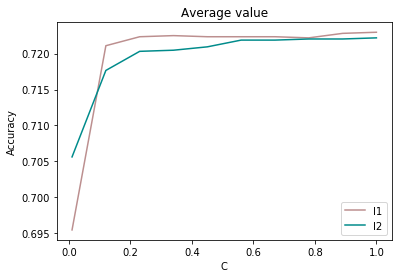

In [ ]:
import matplotlib.pyplot as plt 

l1 = classif.cv_results_['mean_test_score'][::2]
l2 = classif.cv_results_['mean_test_score'][1::2]
plt.title("Average value")
plt.xlabel('C') 
plt.ylabel('Accuracy') 
plt.plot(c, l1, color = 'rosybrown', label='l1') 
plt.plot(c, l2, color = 'darkcyan', label='l2')
plt.legend(loc = 'lower right')

plt.show()



Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [ ]:
f = classif.best_params_
print(f)

{'C': 1.0, 'penalty': 'l1'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [ ]:
best_lr_clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000, C=f['C'], penalty=f['penalty'])
best_lr_clf.fit(train_feature_matrix, train_labels)
predict = best_lr_clf.predict_proba(test_feature_matrix)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

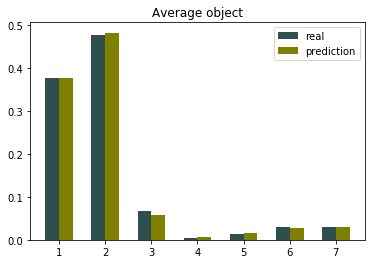

In [ ]:
plt.title("Average object")
predicted_proba = predict.mean(axis=0)
ax, real_proba = np.unique(test_labels, return_counts=True)
plt.bar(range(1, 8), real_proba / len(test_labels), width=-0.3, color = "darkslategrey", label='real', align="edge")
plt.bar(range(1, 8), predicted_proba, width=0.3, color = "olive", label='prediction', align="edge")
plt.legend(loc = 'upper right')

plt.show()

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=5, weights = 'uniform')
kn_clf.fit(train_feature_matrix, train_labels)
prediction = kn_clf.predict(test_feature_matrix)

print("accuracy: %f" % accuracy_score(test_labels, prediction))

NameError: ignored

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

{'n_neighbors': 6, 'weights': 'distance'}


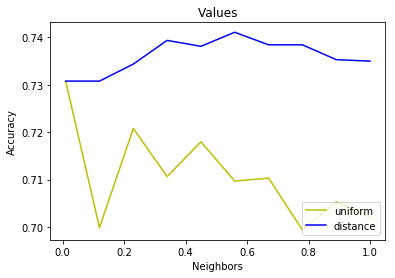

In [ ]:
#weights = {'weights': ['uniform', 'distance']}
#neighbors = {'n_neighbors': range(1, 10)}
params = {'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

classif = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
classif.fit(train_feature_matrix, train_labels)
best = classif.best_params_
uniform = classif.cv_results_['mean_test_score'][::2]
distance = classif.cv_results_['mean_test_score'][1::2]
print(best)

plt.title("Values")
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.plot(c, uniform, label='uniform', color = 'y')
plt.plot(c, distance, label='distance', color = 'b')
plt.legend(loc = 'lower right')

plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [ ]:
best_knn_clf = KNeighborsClassifier(n_neighbors=best['n_neighbors'], weights=best['weights'])
best_knn_clf.fit(train_feature_matrix, train_labels)
predicted = best_knn_clf.predict_proba(test_feature_matrix)
predict_proba = predicted.mean(axis=0)

plt.title("Class")
plt.bar(range(1, 8), real_proba, label='real', width=-0.3, align="edge")
plt.bar(range(1, 8), predict_proba, label='prediction', width=0.3, align="edge")
plt.legend(loc = 'upper right')

plt.show()

NameError: ignored

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [ ]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе

best_knn_clf = KNeighborsClassifier(n_neighbors=best['n_neighbors'], weights=best['weights'])
best_knn_clf.fit(train_feature_matrix, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [ ]:
data_f = scale(delayed_data[delayed_data.columns[:-1]].values)
data_l = delayed_data[delayed_data.columns[-1]].values
lr = best_lr_clf.predict(data_f)
knn = best_knn_clf.predict(data_f)
print("best_lr_clf: %f" % accuracy_score(data_l, lr))
print("best_knn_clf: %f" % accuracy_score(data_l, knn))

best_lr_clf: 0.725500
best_knn_clf: 0.732500


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)